In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')
class_name = ['Футболка', 'Брюки', 'Свитер', 'Платье', 'Плащ', 'Сандали', 'Рубашка', 'Кроссовки', 'Сумка', 'Ботинки']

f_mnist = tf.keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = f_mnist.load_data()

In [ ]:
!pip install opencv-python

Нормализация

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train = np.expand_dims(X_train, axis = 3)
X_test = np.expand_dims(X_test, axis = 3)

Преобразование выходного значения в вектор

In [ ]:
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes = 10)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes = 10)

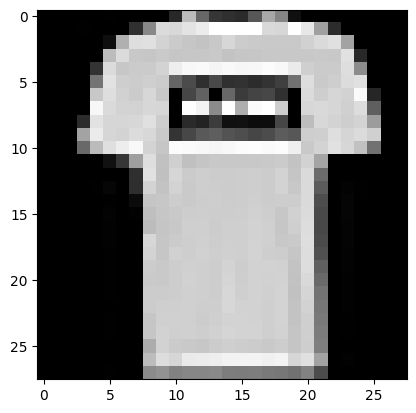

Футболка


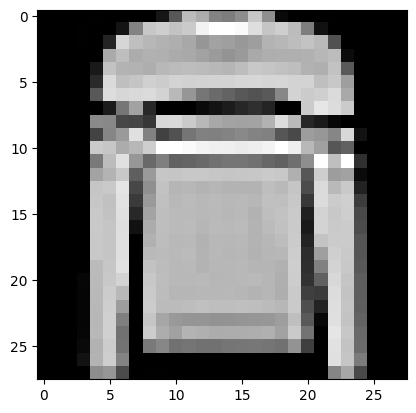

Свитер


In [ ]:
plt.imshow(X_train[1][:,:,0],cmap='gray')
plt.show()
print(class_name[np.argmax(Y_train[1])])
plt.imshow(X_train[5][:,:,0],cmap='gray')
plt.show()
print(class_name[np.argmax(Y_train[5])])

CNN

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = keras.Sequential([
    Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (28,28,1)), #Сверточный слой.padding='same'добавление граничных элементов.Для сохранения исходного изображения элементов
    MaxPooling2D(pool_size=(2,2), strides=(2,2)), #Изменение масштаба на 14х14 (отбор наибольшего значения в окнах 2 на 2) . Для анализа на более крупном масштабе и выделения более общих признаков
    Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)), #strides - шаг пикселя
    Flatten(), #Преобразование один вектор
    Dense(128, activation = "relu"),
    Dense(10, activation = "softmax")
])
print(model.summary())

model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 10

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 3136)              0         
                                                                 
 dense_18 (Dense)            (None, 128)              

Обучение

In [ ]:
history = model.fit(X_train,Y_train, batch_size=300, epochs = epochs, validation_split = 0.2)

Epoch 1/10
160/160 [==============================] - 59s 364ms/step - loss: 0.5981 - accuracy: 0.7887 - val_loss: 0.4113 - val_accuracy: 0.8546
Epoch 2/10
160/160 [==============================] - 56s 348ms/step - loss: 0.3602 - accuracy: 0.8720 - val_loss: 0.3346 - val_accuracy: 0.8813
Epoch 3/10
160/160 [==============================] - 54s 334ms/step - loss: 0.3105 - accuracy: 0.8882 - val_loss: 0.2974 - val_accuracy: 0.8947
Epoch 4/10
160/160 [==============================] - 55s 345ms/step - loss: 0.2772 - accuracy: 0.9014 - val_loss: 0.2968 - val_accuracy: 0.8935
Epoch 5/10
160/160 [==============================] - 55s 343ms/step - loss: 0.2575 - accuracy: 0.9075 - val_loss: 0.2757 - val_accuracy: 0.9001
Epoch 6/10
160/160 [==============================] - 54s 338ms/step - loss: 0.2412 - accuracy: 0.9119 - val_loss: 0.2521 - val_accuracy: 0.9114
Epoch 7/10
160/160 [==============================] - 55s 347ms/step - loss: 0.2228 - accuracy: 0.9185 - val_loss: 0.2498 - val_ac

Тест

1/1 [==============================] - 0s 71ms/step
Ботинки


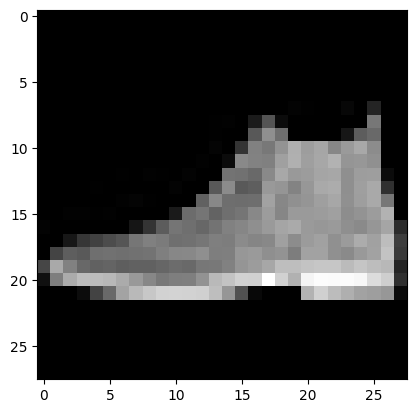

Свитер


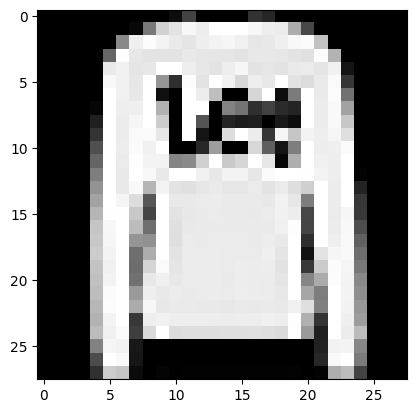

Брюки


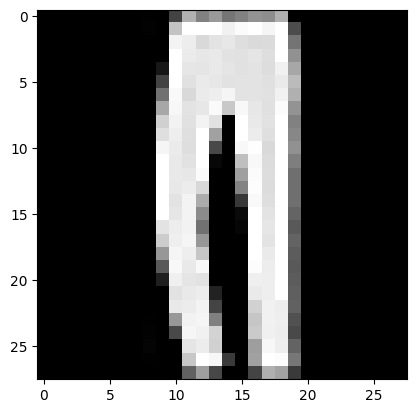

Брюки


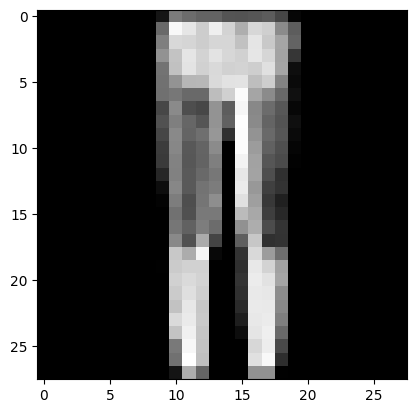

Рубашка


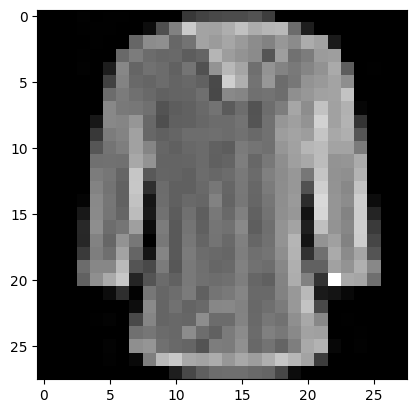

In [ ]:
predictions = model.predict(X_test[:5])
for i in range(len(predictions)):
  print(class_name[np.argmax(predictions[i])])
  plt.imshow(X_test[i][:,:,0],cmap='gray')
  plt.show()